In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#mporting the google play reviews data
data = pd.read_csv('google_play_reviews.csv')
data.head()

,Unnamed: 0,app_name,app_genre,avg_rating,num_downloads,num_reviews,user,review_text,rating
0,0,VPN Proxy Master - Safer Vpn,NaN,4.5star,50M+,672K reviews,Yoko,"Annoying, automatic server selection not worki...",1
1,1,VPN Proxy Master - Safer Vpn,NaN,4.5star,50M+,672K reviews,Laggianput,"The app works. Barely. It does have a vpn, and...",2
2,2,VPN Proxy Master - Safer Vpn,NaN,4.5star,50M+,672K reviews,karos daliri,Very good quality. I really liked it i hope it...,5
3,3,Busuu: Learn Languages,NaN,4.1star,10M+,491K reviews,Алексей Васильев,It's awesome. It's not just an app for learnin...,5
4,4,Busuu: Learn Languages,NaN,4.1star,10M+,491K reviews,Marta M,I used a free trial version for a couple of da...,3


In [3]:
#remove duplicates
data_copy = data.copy()
data_copy.drop_duplicates(inplace=True)



In [4]:
#remove unwanted columns
drop_columns =['Unnamed: 0','review_text']
data_copy.drop(columns=drop_columns,inplace=True)
data_copy.head()


,app_name,app_genre,avg_rating,num_downloads,num_reviews,user,rating
0,VPN Proxy Master - Safer Vpn,NaN,4.5star,50M+,672K reviews,Yoko,1
1,VPN Proxy Master - Safer Vpn,NaN,4.5star,50M+,672K reviews,Laggianput,2
2,VPN Proxy Master - Safer Vpn,NaN,4.5star,50M+,672K reviews,karos daliri,5
3,Busuu: Learn Languages,NaN,4.1star,10M+,491K reviews,Алексей Васильев,5
4,Busuu: Learn Languages,NaN,4.1star,10M+,491K reviews,Marta M,3


In [5]:
# rename columns: avg_rating, number of downloads, and number of reviews
data_copy.rename(columns={'avg_rating':'average_rating','num_downloads':'downloads','num_reviews':'reviews'},inplace=True)



In [7]:
#remove characters from average_rating,	downloads, andreviews

data_copy['average_rating']= data_copy['average_rating'].str.replace("star","")
data_copy['downloads']=data_copy['downloads'].str.replace("M","000000 ").str.replace("+","").str.replace("K","000").str.replace("B","000000000")
data_copy['reviews']= data_copy['reviews'].str.replace("K","000").str.replace("reviews","").str.replace("M", "0000").str.replace(".","").str.replace("B","000000000")
data_copy.head()

C:\Users\khuma\AppData\Local\Temp\ipykernel_31564\3185370220.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_copy['downloads']=data_copy['downloads'].str.replace("M","000000 ").str.replace("+","").str.replace("K","000").str.replace("B","000000000")
C:\Users\khuma\AppData\Local\Temp\ipykernel_31564\3185370220.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_copy['reviews']= data_copy['reviews'].str.replace("K","000").str.replace("reviews","").str.replace("M", "0000").str.replace(".","").str.replace("B","000000000")


,app_name,app_genre,average_rating,downloads,reviews,user,rating
0,VPN Proxy Master - Safer Vpn,NaN,4.5,50000000,672000,Yoko,1
1,VPN Proxy Master - Safer Vpn,NaN,4.5,50000000,672000,Laggianput,2
2,VPN Proxy Master - Safer Vpn,NaN,4.5,50000000,672000,karos daliri,5
3,Busuu: Learn Languages,NaN,4.1,10000000,491000,Алексей Васильев,5
4,Busuu: Learn Languages,NaN,4.1,10000000,491000,Marta M,3


In [8]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4888 entries, 0 to 4887
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   app_name        4888 non-null   object
 1   app_genre       3018 non-null   object
 2   average_rating  4888 non-null   object
 3   downloads       4888 non-null   object
 4   reviews         4888 non-null   object
 5   user            4888 non-null   object
 6   rating          4888 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 305.5+ KB


In [9]:
#change data types
data_copy['average_rating']=data_copy['average_rating'].astype('float')
data_copy['downloads']=data_copy['downloads'].astype('float')
data_copy['reviews']=data_copy['reviews'].astype('float')
data_copy.dtypes

app_name           object
app_genre          object
average_rating    float64
downloads         float64
reviews           float64
user               object
rating              int64
dtype: object

In [16]:
#top 5 downloaded Apps from google play
apps =data_copy.groupby('app_name')['downloads'].max().sort_values(ascending=False).reset_index()
apps.head()

,app_name,downloads
0,Gmail,1.000000e+10
1,Google Chrome: Fast & Secure,1.000000e+10
2,YouTube,1.000000e+10
3,Facebook,5.000000e+09
4,Google TV,5.000000e+09


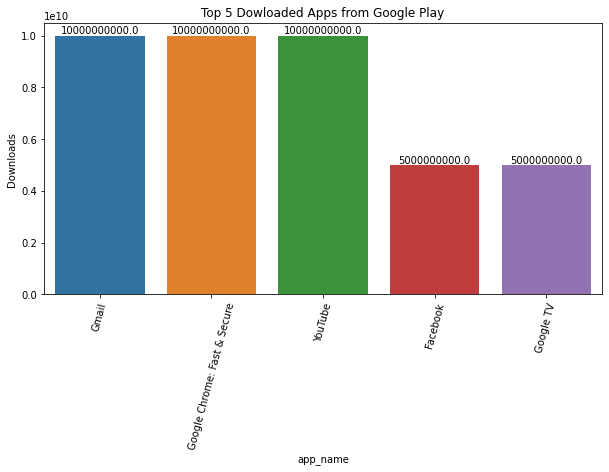

In [18]:
#plotting top downloaded Apps

#settinng the figure size
plt.figure(figsize=(10,5))

app = sns.barplot(x='app_name',y='downloads',data=apps.head(5))

#rotating the axis labels
app.set_xticklabels(labels=apps.head()['app_name'],rotation=75)

#setting the title
app.set_title("Top 5 Dowloaded Apps from Google Play")

#setting the y-axis labels
app.set_ylabel("Downloads")

#labelling the bars in the  bar graph
for a in app.patches:

    app.annotate(a.get_height(),(a.get_x()+a.get_width()/2,a.get_height()),ha='center',va='bottom')